In [ ]:
import folium
from folium.plugins import MarkerCluster, FeatureGroupSubGroup

import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

# Demographics

From:

https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/wellbeing-toronto/

In [ ]:
demogs = pd.read_csv("wellbeing_toronto.csv")

In [ ]:
cols = demogs.columns
demogs.columns = cols.str.replace(" ", "_")

In [ ]:
demogs = demogs.drop(columns=['Combined_Indicators'], axis=1)

In [ ]:
demogs.sample(5)

# Neighbourhoods

From: https://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-boundary-file-

In [6]:
neighbourhoods = gpd.read_file("tor_Neighbourhood_Crime_Rates_Boundary_File_.shp")

In [7]:
neighbourhoods.sample(5)

,OBJECTID,Neighbourh,Neighbou_1,Hood_ID,Neighbou_2,Assault_20,Assault__1,Assault__2,Assault__3,Assault__4,...,Homicide_3,Homicide_4,Homicide_5,Homicide_A,Homicide_C,Homicide_R,Population,Shape__Are,Shape__Len,geometry
118,119,Weston,113,113,Weston,43,45,43,46,32,...,3,1,1,1.7,0%,8.8,11424,2.565538e+06,10202.394100,"POLYGON ((620624.17 4838946.7149, 620610.3339 ..."
49,50,Old East York,058,58,Old East York,102,115,108,96,91,...,1,0,2,1.5,N/A,12.0,16619,2.349933e+06,7485.024652,"POLYGON ((632896.6226999999 4839587.2695, 6329..."
83,84,L'Amoreaux,117,117,L'Amoreaux,68,93,80,106,85,...,2,1,0,1.3,-100%,0.0,29728,7.154891e+06,12565.627127,"POLYGON ((637670.0624000001 4850424.0983, 6376..."
112,113,Woodbine-Lumsden,060,60,Woodbine-Lumsden,99,108,111,95,141,...,0,1,0,1,-100%,0.0,9183,1.196244e+06,4871.174075,"POLYGON ((635572.9808 4839311.768, 635545.5368..."
26,27,Corso Italia-Davenport,092,92,Corso Italia-Davenport,93,98,106,90,100,...,0,0,0,1,N/A,0.0,11380,1.884658e+06,6077.824890,"POLYGON ((626059.2038 4837315.5168, 626063.944..."


In [8]:
neighbourhoods.Hood_ID = neighbourhoods.Hood_ID.astype(float)

In [9]:
neighbourhoods.columns

Index(['OBJECTID', 'Neighbourh', 'Neighbou_1', 'Hood_ID', 'Neighbou_2',
       'Assault_20', 'Assault__1', 'Assault__2', 'Assault__3', 'Assault__4',
       'Assault_AV', 'Assault_CH', 'Assault_Ra', 'Auto_Theft', 'Auto_The_1',
       'Auto_The_2', 'Auto_The_3', 'Auto_The_4', 'AutoTheft_', 'AutoThef_1',
       'AutoThef_2', 'BreakandEn', 'Breakand_1', 'Breakand_2', 'Breakand_3',
       'Breakand_4', 'Breakand_5', 'Breakand_6', 'Breakand_7', 'Robbery_20',
       'Robbery__1', 'Robbery__2', 'Robbery__3', 'Robbery__4', 'Robbery_AV',
       'Robbery_CH', 'Robbery_Ra', 'Theft_Over', 'Theft_Ov_1', 'Theft_Ov_2',
       'Theft_Ov_3', 'Theft_Ov_4', 'TheftOver_', 'TheftOve_1', 'TheftOve_2',
       'Homicide_2', 'Homicide_1', 'Homicide_3', 'Homicide_4', 'Homicide_5',
       'Homicide_A', 'Homicide_C', 'Homicide_R', 'Population', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')

In [10]:
neighbourhoods = neighbourhoods.drop(columns=['OBJECTID', 'Neighbou_1', 'Neighbou_2',
       'Assault_20', 'Assault__1', 'Assault__2', 'Assault__3', 'Assault__4',
       'Assault_AV', 'Assault_CH', 'Assault_Ra', 'Auto_Theft', 'Auto_The_1',
       'Auto_The_2', 'Auto_The_3', 'Auto_The_4', 'AutoTheft_', 'AutoThef_1',
       'AutoThef_2', 'BreakandEn', 'Breakand_1', 'Breakand_2', 'Breakand_3',
       'Breakand_4', 'Breakand_5', 'Breakand_6', 'Breakand_7', 'Robbery_20',
       'Robbery__1', 'Robbery__2', 'Robbery__3', 'Robbery__4', 'Robbery_AV',
       'Robbery_CH', 'Robbery_Ra', 'Theft_Over', 'Theft_Ov_1', 'Theft_Ov_2',
       'Theft_Ov_3', 'Theft_Ov_4', 'TheftOver_', 'TheftOve_1', 'TheftOve_2',
       'Homicide_2', 'Homicide_1', 'Homicide_3', 'Homicide_4', 'Homicide_5',
       'Homicide_A', 'Homicide_C', 'Homicide_R'], axis=1)

In [11]:
neighbourhoods['Neighbourhood_Id'] = neighbourhoods.Hood_ID

In [12]:
neighbourhoods.sample(5)

,Neighbourh,Hood_ID,Population,Shape__Are,Shape__Len,geometry,Neighbourhood_Id
111,Woburn,137.0,34912,1.233407e+07,18111.265199,"POLYGON ((643995.9336 4845564.4943, 643990.221...",137.0
103,Rexdale-Kipling,4.0,6862,2.505576e+06,7067.058558,"POLYGON ((616383.4884 4841023.0371, 616390.132...",4.0
136,Wychwood,94.0,7397,1.682111e+06,5435.022062,"POLYGON ((626059.2038 4837315.5168, 626139.408...",94.0
113,Bayview Village,52.0,24547,5.159044e+06,9504.072053,"POLYGON ((632015.8464 4847022.6326, 631977.706...",52.0
45,Bayview Woods-Steeles,49.0,8350,4.088934e+06,8253.154282,"POLYGON ((628993.6406 4851050.5149, 629137.465...",49.0


In [13]:
neighbourhoods.crs

{'init': 'epsg:26717'}

### Same?

In [14]:
len(neighbourhoods.Hood_ID.unique())

140

In [15]:
len(demogs.Neighbourhood_Id.unique())

140

Yes!

# Merging

In [16]:
neighbourhoods = neighbourhoods.merge(demogs, on='Neighbourhood_Id')

In [17]:
neighbourhoods.sample(5)

,Neighbourh,Hood_ID,Population,Shape__Are,Shape__Len,geometry,Neighbourhood_Id,Neighbourhood,Total_Population,Average_Family_Income,After-Tax_Household_Income
132,Woodbine Corridor,64.0,10034,1.595684e+06,5428.087921,"POLYGON ((635847.9969 4836016.8098, 635707.643...",64.0,Woodbine Corridor,12541.0,90338.0,63343.0
74,Rosedale-Moore Park,98.0,26195,4.669066e+06,9663.319804,"POLYGON ((631915.8236 4836891.7833, 631846.729...",98.0,Rosedale-Moore Park,20923.0,249884.0,72915.0
20,Humbermede,22.0,6029,4.421665e+06,12445.721939,"POLYGON ((618664.5042 4843429.3221, 618647.924...",22.0,Humbermede,15545.0,59697.0,48655.0
130,Moss Park,73.0,18649,1.413052e+06,6204.526297,"POLYGON ((632898.4247 4834716.0865, 632871.368...",73.0,Moss Park,20506.0,87222.0,37295.0
75,Oakwood Village,107.0,28525,2.219473e+06,6334.989436,"POLYGON ((624869.2848 4839019.6082, 624944.803...",107.0,Oakwood Village,21210.0,67809.0,46349.0


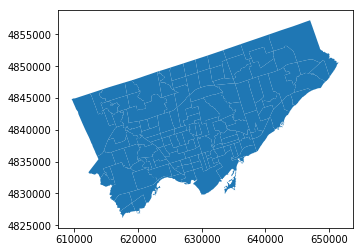

In [18]:
neighbourhoods.plot()
plt.show()

In [19]:
neighbourhoods.crs

{'init': 'epsg:26717'}

In [20]:
neighbourhoods = neighbourhoods.to_crs({'init': 'epsg:4326'})

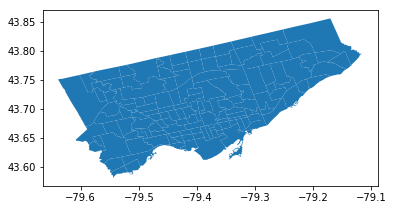

In [21]:
neighbourhoods.plot()
plt.show()

# Creating Fake Clusters ...
based off of income

In [22]:
neighbourhoods.sample(0)

,Neighbourh,Hood_ID,Population,Shape__Are,Shape__Len,geometry,Neighbourhood_Id,Neighbourhood,Total_Population,Average_Family_Income,After-Tax_Household_Income


In [23]:
k3_0_df = neighbourhoods.query("Average_Family_Income < 68000")
k3_1_df = neighbourhoods.query("Average_Family_Income > 68001 & Average_Family_Income < 100000")
k3_2_df = neighbourhoods.query("Average_Family_Income > 100001 ")

In [24]:
k3_0_df.shape

(49, 11)

In [25]:
k3_1_df.shape

(61, 11)

In [26]:
k3_2_df.shape

(30, 11)

In [27]:
neighbourhoods.shape

(140, 11)

# Collisions

from = http://data.torontopolice.on.ca/datasets/ksi/data

In [28]:
collisions = gpd.read_file("KSI.shp")

In [29]:
collisions.sample(5)

,Index_,ACCNUM,YEAR,DATE,TIME,Hour,STREET1,STREET2,OFFSET,ROAD_CLASS,...,REDLIGHT,ALCOHOL,DISABILITY,Division,Ward_Name,Ward_ID,Hood_ID,Hood_Name,ObjectId,geometry
10528,5247781,1108193,2009,2009-06-05T04:00:00.000Z,1547,15,FINCH AVE W,HALESIA DR,None,Major Arterial,...,None,None,None,23,None,None,1,None,7285,POINT (-79.60668999999999 43.733745)
6425,5259758,1113557,2009,2009-07-10T04:00:00.000Z,1900,19,KEELE ST,VICTORY DR,None,Major Arterial,...,None,None,None,31,None,None,26,None,9182,POINT (-79.48249 43.728545)
9420,80244877,5001212779,2015,2015-07-17T04:00:00.000Z,827,8,SPADINA RD,DUPONT ST,None,Major Arterial,...,None,None,None,"14,53",None,None,95,None,2177,POINT (-79.40710799999999 43.67484499999998)
2565,5381214,1047910,2008,2008-07-14T04:00:00.000Z,1337,13,DANFORTH AVE,COXWELL AVE,None,Major Arterial,...,None,None,Yes,"54,55",None,None,64,None,5322,POINT (-79.32359 43.683345)
7151,80512234,6000733806,2016,2016-04-29T04:00:00.000Z,1930,19,MILLWOOD RD,MCRAE DR,63 m West of,Collector,...,None,None,None,53,None,None,56,None,9908,POINT (-79.36903700000001 43.70487799999999)


In [30]:
collisions.columns

Index(['Index_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'Hour', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'District', 'LATITUDE', 'LONGITUDE',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'Division', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Hood_Name', 'ObjectId', 'geometry'],
      dtype='object')

In [31]:
collisions = collisions.drop(columns=[ 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'Hour', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'District', 'LATITUDE', 'LONGITUDE',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'Division', 'Ward_Name', 'Ward_ID', 
       'Hood_Name', 'ObjectId'],
                            axis=1)

In [32]:
collisions.sample(5)

,Index_,ACCLASS,Hood_ID,geometry
2891,6624105,Non-Fatal Injury,40,POINT (-79.40669 43.74414499999999)
7208,80000027,Fatal,11,POINT (-79.58357599999999 43.66046399999999)
7200,6101710,Non-Fatal Injury,127,POINT (-79.24448999999998 43.74954499999999)
5616,6723382,Non-Fatal Injury,76,POINT (-79.37899 43.65164499999999)
3161,5385700,Non-Fatal Injury,127,POINT (-79.25199000000001 43.745445)


In [33]:
collisions.ACCLASS.value_counts()

Non-Fatal Injury    10538
Fatal                1706
Name: ACCLASS, dtype: int64

In [34]:
major = collisions.query("ACCLASS == 'Fatal'")
minor = collisions.query("ACCLASS == 'Non-Fatal Injury'")

In [35]:
collisions.crs

{'init': 'epsg:4326'}

# Sidewalks

from: https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/locations-and-mapping/#3763d352-5f0a-4385-4cec-f255d4860ea5

In [36]:
sidewalks = gpd.read_file("Sidewalk_Inventory_wgs84.shp")

In [37]:
sidewalks.crs

{'init': 'epsg:4326'}

In [38]:
sidewalks.sample(5)

,LINEAR_N_1,LINEAR_N_2,ADDRESS_L,ADDRESS_R,LINEAR_N_3,LINEAR_N_4,LINEAR_N_5,LINEAR_N_6,JURISDICTI,SDWLK_Code,Partial,Multiuse,Road_Type,SDWLK_DESC,Shape_Leng,GEO_ID,geometry
61498,Dairy Dr,Dairy Drive,15-19,10-10,Dairy,Dr,None,None,CITY OF TORONTO,6,0,0,Pending,Roadway under development,44.058843,30075122.0,LINESTRING (-79.2732110445212 43.7008395213857...
41035,Grosvenor St,Grosvenor Street,3-3,2-2,Grosvenor,St,None,None,CITY OF TORONTO,7,0,0,Collector,Sidewalk on both sides,51.873855,14020343.0,LINESTRING (-79.38398803769432 43.662966001445...
20329,Mission Dr,Mission Drive,None,None,Mission,Dr,None,None,CITY OF TORONTO,3,0,0,Local,No sidewalk on either side,85.345270,441335.0,LINESTRING (-79.31741675665465 43.747642849247...
13258,The Esplanade,The Esplanade,94-118,105-115,The Esplanade,None,None,None,CITY OF TORONTO,7,0,0,Collector,Sidewalk on both sides,96.602211,10011044.0,LINESTRING (-79.37292952973391 43.647495209924...
9194,Hartley Ave,Hartley Avenue,4-4,None,Hartley,Ave,None,None,CITY OF TORONTO,7,0,0,Local,Sidewalk on both sides,49.542109,14068746.0,LINESTRING (-79.45415361514596 43.694820814700...


In [39]:
sidewalks.columns

Index(['LINEAR_N_1', 'LINEAR_N_2', 'ADDRESS_L', 'ADDRESS_R', 'LINEAR_N_3',
       'LINEAR_N_4', 'LINEAR_N_5', 'LINEAR_N_6', 'JURISDICTI', 'SDWLK_Code',
       'Partial', 'Multiuse', 'Road_Type', 'SDWLK_DESC', 'Shape_Leng',
       'GEO_ID', 'geometry'],
      dtype='object')

In [40]:
sidewalks=sidewalks.drop(columns=['LINEAR_N_1', 'LINEAR_N_2', 'ADDRESS_L', 'ADDRESS_R', 'LINEAR_N_3',
       'LINEAR_N_4', 'LINEAR_N_5', 'LINEAR_N_6', 'JURISDICTI', 'SDWLK_Code',
       'Partial', 'Multiuse', 'SDWLK_DESC', 'Shape_Leng',
       'GEO_ID'])

In [41]:
sidewalks.Road_Type.value_counts()

Local                            24377
Trail                             6837
Collector                         6267
Major Arterial                    5983
Geostatistical line               4162
Laneway                           4109
Minor Arterial                    3530
Other                             2034
Expressway                        1452
Expressway Ramp                   1268
River                             1004
Major Railway                      827
Pending                            809
Hydro Line                         649
Pathway                            621
Walkway                            330
Major Shoreline                    252
Major Arterial Ramp                205
Access Road                         38
Creek/Tributary                     20
Ferry Route                         19
Collector Ramp                      17
Minor Railway                       16
Other Ramp                          12
Busway                              10
Minor Arterial Ramp      

In [42]:
roads_local = sidewalks.query("Road_Type == 'Local'")
roads_collector = sidewalks.query("Road_Type == 'Collector'")
roads_major_arterial = sidewalks.query("Road_Type == 'Major Arterial'")
roads_minor_arterial = sidewalks.query("Road_Type == 'Minor Arterial'")
roads_Expressway = sidewalks.query("Road_Type == 'Expressway'")
roads_Ex_ramp = sidewalks.query("Road_Type == 'Expressway Ramp'")

# Mapping Time

In [55]:
m = folium.Map(location=[43.65, -79.38], zoom_start=11)

In [56]:
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)

In [45]:
road_dfs = {"Local Roads":roads_local, 
            "Collector Roads":roads_collector, 
            "Roads Major Arterial":roads_major_arterial,
                   "Roads Minor Arterial":roads_minor_arterial,
            "Expressways":roads_Expressway, 
            "Expressway Ramps":roads_Ex_ramp                  }

In [46]:
road_types = list(road_dfs.keys())

In [47]:
len(road_types)

6

In [48]:
#colorbrewer palette
cb = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']

In [57]:
#adding road type layers
#folium.GeoJson(road_dfs[road_types[0]],
#               name=road_types[0],
#               style_function=lambda x: {'weight':4,'color':cb[0],'dashArray':'1 3'},
#               highlight_function=lambda x: {'weight':8,'color':cb[0], 'dashArray':'1 7'},
#               smooth_factor=5.0,
#               show=False
#          ).add_to(m)

folium.GeoJson(road_dfs[road_types[1]],
               name=road_types[1],
               style_function=lambda x: {'weight':4,'color':cb[1],'dashArray':'1 3'},
               highlight_function=lambda x: {'weight':8,'color':cb[1], 'dashArray':'1 7'},
               smooth_factor=5.0,
               show=False
          ).add_to(m)

folium.GeoJson(road_dfs[road_types[2]],
               name=road_types[2],
               style_function=lambda x: {'weight':4,'color':cb[2],'dashArray':'1 3'},
               highlight_function=lambda x: {'weight':8,'color':cb[2], 'dashArray':'1 7'},
               smooth_factor=5.0,
               show=False
          ).add_to(m)

folium.GeoJson(road_dfs[road_types[3]],
               name=road_types[3],
               style_function=lambda x: {'weight':4,'color':cb[3],'dashArray':'1 3'},
               highlight_function=lambda x: {'weight':8,'color':cb[3], 'dashArray':'1 7'},
               smooth_factor=5.0,
               show=False
          ).add_to(m)


folium.GeoJson(road_dfs[road_types[4]],
               name=road_types[4],
               style_function=lambda x: {'weight':4,'color':cb[4],'dashArray':'1 3'},
               highlight_function=lambda x: {'weight':8,'color':cb[4], 'dashArray':'1 7'},
               smooth_factor=5.0,
               show=False
          ).add_to(m)

folium.GeoJson(road_dfs[road_types[5]],
               name=road_types[5],
               style_function=lambda x: {'weight':4,'color':cb[5],'dashArray':'1 3'},
               highlight_function=lambda x: {'weight':8,'color':cb[5], 'dashArray':'1 7'},
               smooth_factor=5.0,
               show=False
          ).add_to(m)

In [50]:
#creating a geojson object with neighbourhood polygons to shade by median income and add to the base plot `m`.
neighbourhoods_shapes = folium.Choropleth(
    geo_data=neighbourhoods,
    name='Mean Income by Neighbourhood (2014)', #this text appears in the layercontrol
    data=neighbourhoods, #this is our df
    columns=['Neighbourh', 'Average_Family_Income'], #which fields to map via choropleth
    key_on='feature.properties.Neighbourh',  #key id
    fill_color='BuPu',
    fill_opacity=0.6,
    line_opacity=0.5,
    color='black',
    highlight=True,
    legend_name='Mean Income by Neighbourhood (2014)'
).add_to(m)

#adding tooltip with neighbourhood name and median income to the polygon objects above
folium.features.GeoJsonTooltip(fields=['Neighbourh', 'Average_Family_Income'],
                               aliases=['Neighbourhood','Mean Income'],
                               labels=True, 
                               sticky=True,
                               localize=True
                              ).add_to(neighbourhoods_shapes.geojson)

In [58]:
#adding marker cluster plugin to map
mc = MarkerCluster(name='Base Layer', control=False)
m.add_child(mc)

#creating subgroups for Minor collisions, Major & Fatal collisions so they can be toggled on/off.
group_minor = FeatureGroupSubGroup(mc, 'Minor Collisions', show=False)
m.add_child(group_minor)

group_major = FeatureGroupSubGroup(mc, 'Major & Fatal Collisions', show=False)
m.add_child(group_major)

#adding markers per group
for intersection in major.iterrows():

        coord = (round(intersection[1].geometry.y,4),
                round(intersection[1].geometry.x,4))

        int_name = "Intersection "+str(intersection[1].Index_)

        folium.Marker(coord,
                      popup= int_name,
                      name= int_name).add_to(group_major)

for intersection in minor.iterrows():

    coord = (round(intersection[1].geometry.y,4),
            round(intersection[1].geometry.x,4))

    int_name = "Intersection "+str(intersection[1].Index_)

    folium.Marker(coord,
                  popup= int_name,
                  name= int_name).add_to(group_minor)

In [59]:
# k3

#adding clusters

#k8
k3_0 = folium.Choropleth(
    geo_data=k3_0_df,
    name='k=3, Group 0',
    fill_color=cb[0],
    fill_opacity=0.65,
    show=False,
    line_weight=2).add_to(m)

folium.features.GeoJsonTooltip(fields=['Neighbourh', 'Average_Family_Income'],
                               aliases=['Neighbourhood','Mean Income'],
                               labels=True, 
                               sticky=False,
                               localize=True
                              ).add_to(k3_0.geojson)

k3_1 = folium.Choropleth(
    geo_data=k3_1_df,
    name='k=3, Group 1',
    fill_color=cb[1],
    fill_opacity=0.65,
    show=False,
    line_weight=2).add_to(m)

folium.features.GeoJsonTooltip(fields=['Neighbourh', 'Average_Family_Income'],
                               aliases=['Neighbourhood','Mean Income'],
                               labels=True, 
                               sticky=False,
                               localize=True
                              ).add_to(k3_1.geojson)

k3_2 = folium.Choropleth(
    geo_data=k3_2_df,
    name='k=3, Group 2',
    fill_color=cb[2],
    fill_opacity=0.65,
    show=False,
    line_weight=2).add_to(m)

folium.features.GeoJsonTooltip(fields=['Neighbourh', 'Average_Family_Income'],
                               aliases=['Neighbourhood','Mean Income'],
                               labels=True, 
                               sticky=False,
                               localize=True
                              ).add_to(k3_2.geojson)

In [60]:
#adding layer control for toggling layers on and off

folium.LayerControl().add_to(m)

In [61]:
m.save("toronto.html")
print('saved!')

saved!
